# Results of both Similarity and genre classification models

There are some genres that are more unique and easier to indentify. For example, classical or metal as they have very distinct sounds from the rest. However it becomes very hard to classify songs like rock from bands like the Rolling stones, guns n roses, etc. because they share a lot of elements with metal, blues, rock, pop, etc.

Note: the csv files used for this files are not included in the repository.

## Metal: ACDC and Metallica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def mean_probabilities(probabilities):
    genres = pd.read_csv('vggish_features.csv')['genre']
    
    # label encoding
    le = LabelEncoder()
    genres_int = le.fit_transform(genres)
    mean_probabilities = {}
    for i in range(10):
        genres = le.inverse_transform([i])
        mean_probabilities[genres[0]] = np.mean(probabilities[:, i])
    return mean_probabilities

def plot_probabilities(probabilities, title):
    plt.bar(probabilities.keys(), probabilities.values())
    plt.xlabel('Genre')
    plt.ylabel('Probability')
    plt.title(f'Mean Predicted Genre Probabilities for{title}')
    plt.show()


Classifying songs...
(55, 3968)
Classifying songs...
(25, 3968)


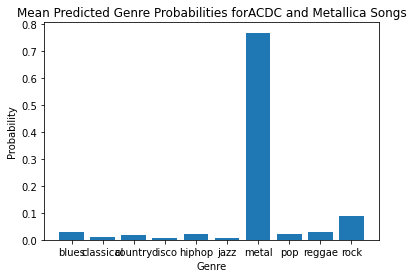

In [2]:
import vggish_genre_classifier as classifier

acdc_preds, acdc_probs = classifier.classify_songs('acdc.csv', plot=False)
metallica_preds, metallica_probs = classifier.classify_songs('metallica.csv', plot=False)

probs = np.append(acdc_probs, metallica_probs, axis=0)
plot_probabilities(mean_probabilities(probs), 'ACDC and Metallica Songs')


### Just ACDC

Classifying songs...
(55, 3968)


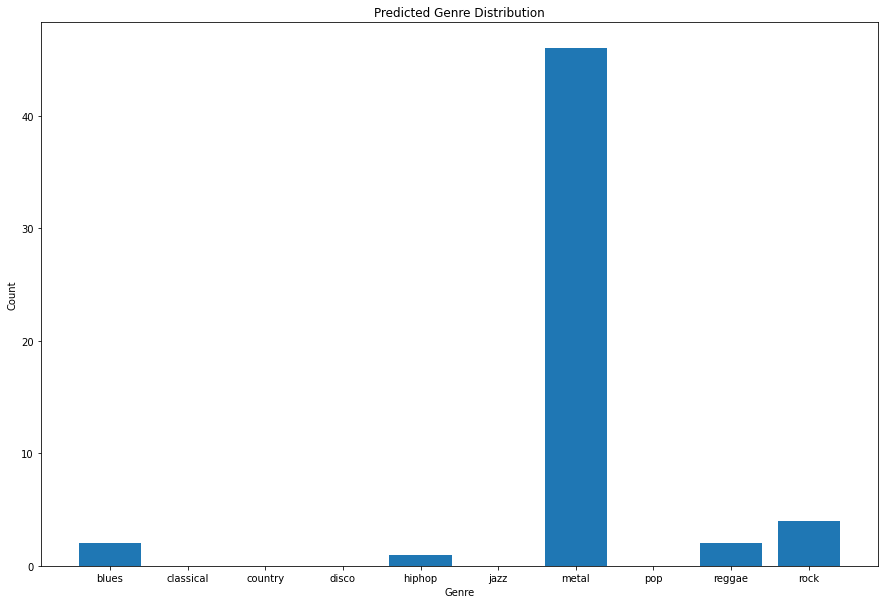

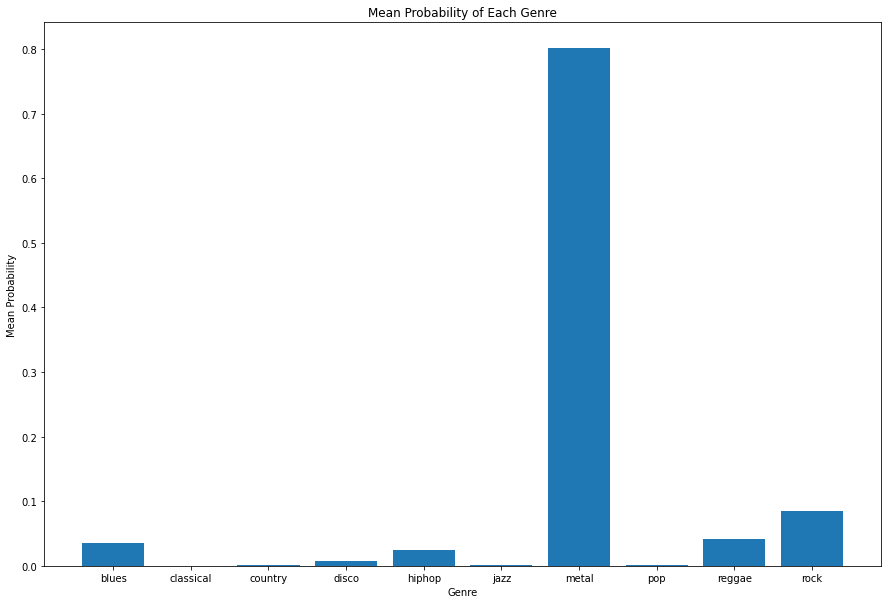

In [3]:
acdc_preds, acdc_probs = classifier.classify_songs('acdc.csv', plot=True)

### Just Metallica

Classifying songs...
(25, 3968)


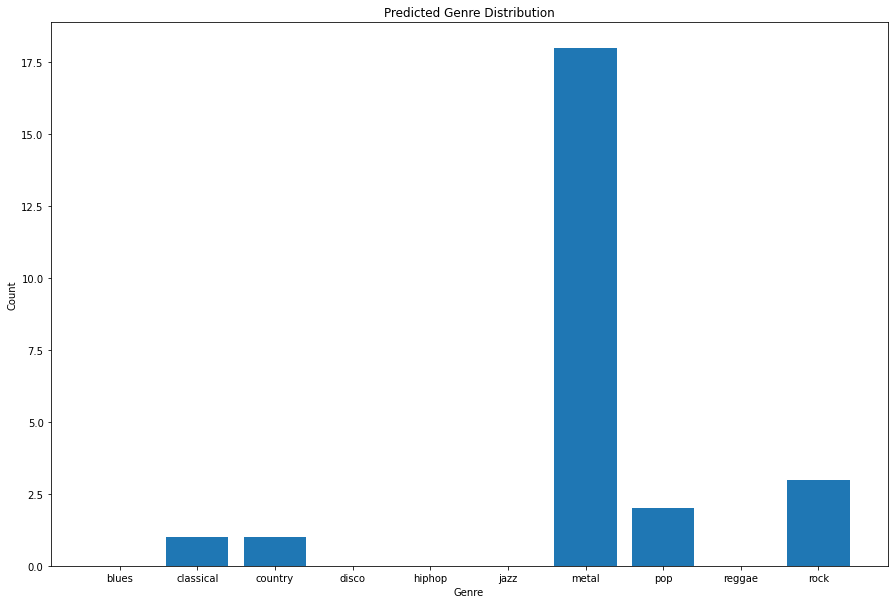

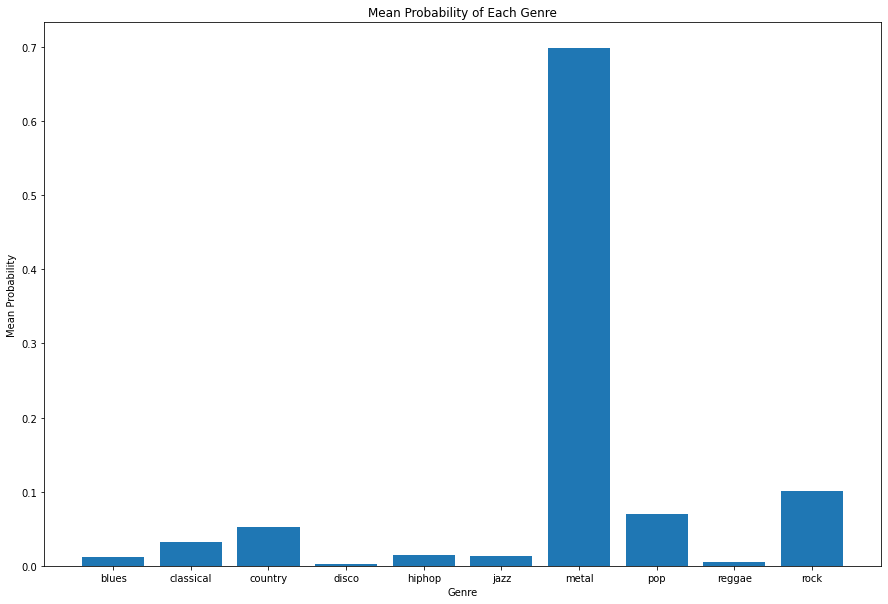

In [9]:
metallica_preds, metallica_probs = classifier.classify_songs('metallica.csv', plot=True)

### Rolling Stones

Classifying songs...
(31, 3968)


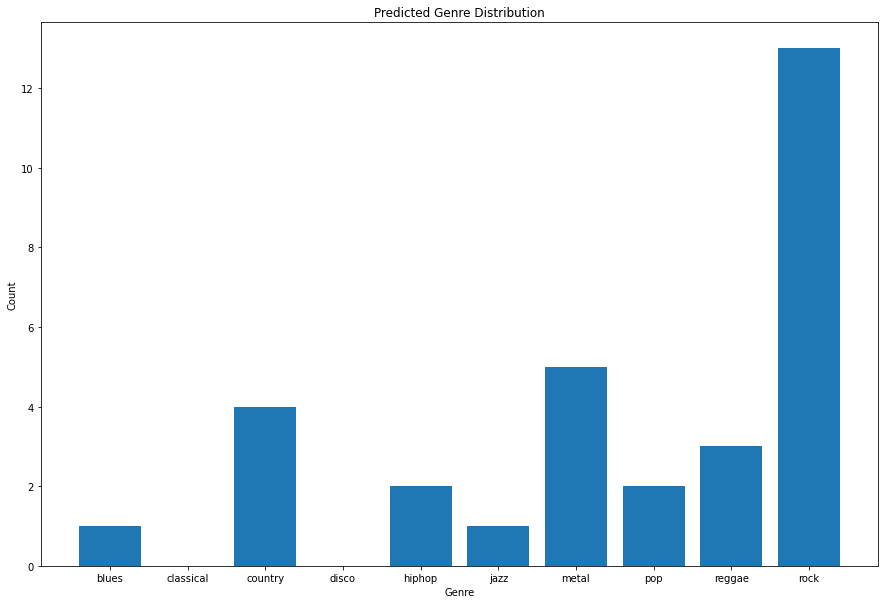

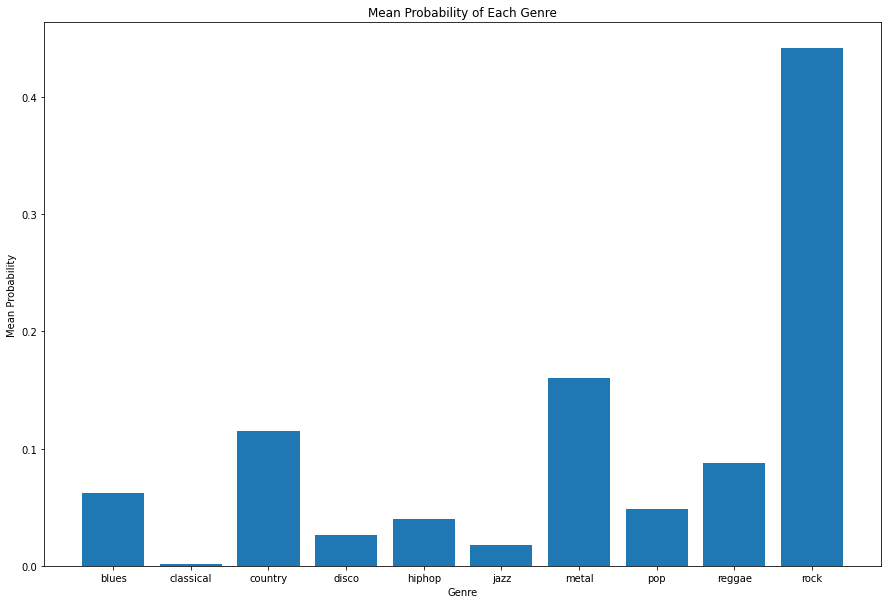

In [5]:
rolling_preds, rolling_probs = classifier.classify_songs('rolling_stones.csv', plot=True)

### Pink floyd

Classifying songs...
(27, 3968)


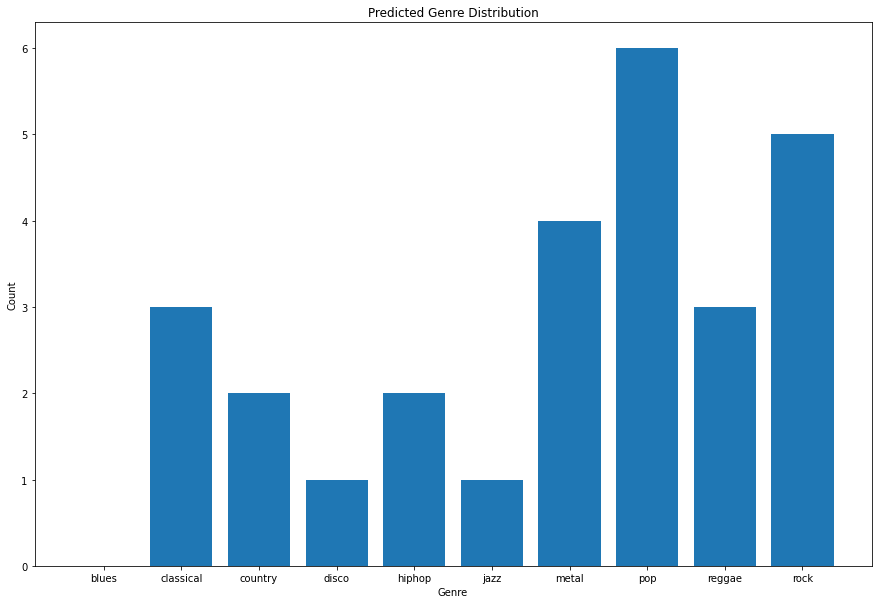

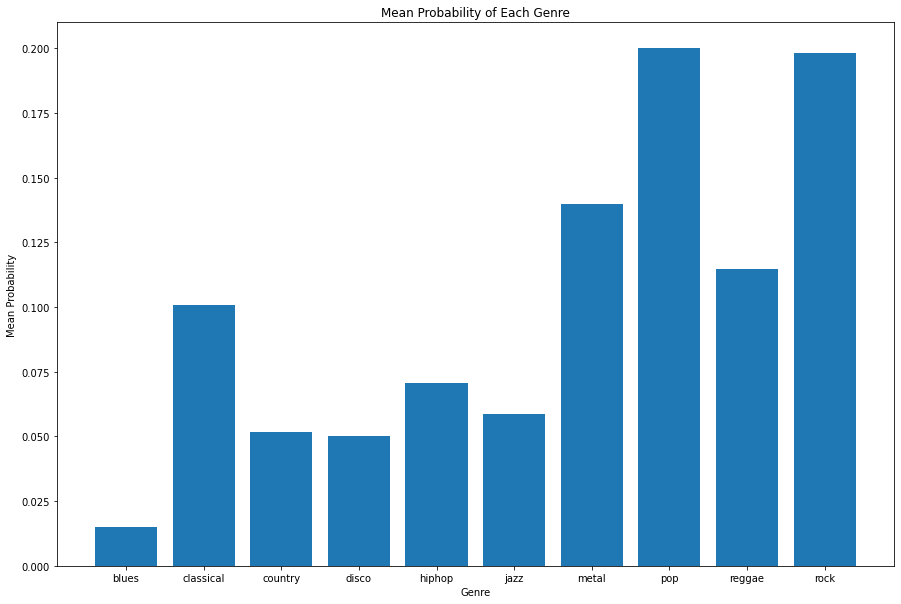

In [6]:
pink_preds, pink_probs = classifier.classify_songs('pink_floyd.csv', plot=True)


### Queen

Classifying songs...
(50, 3968)


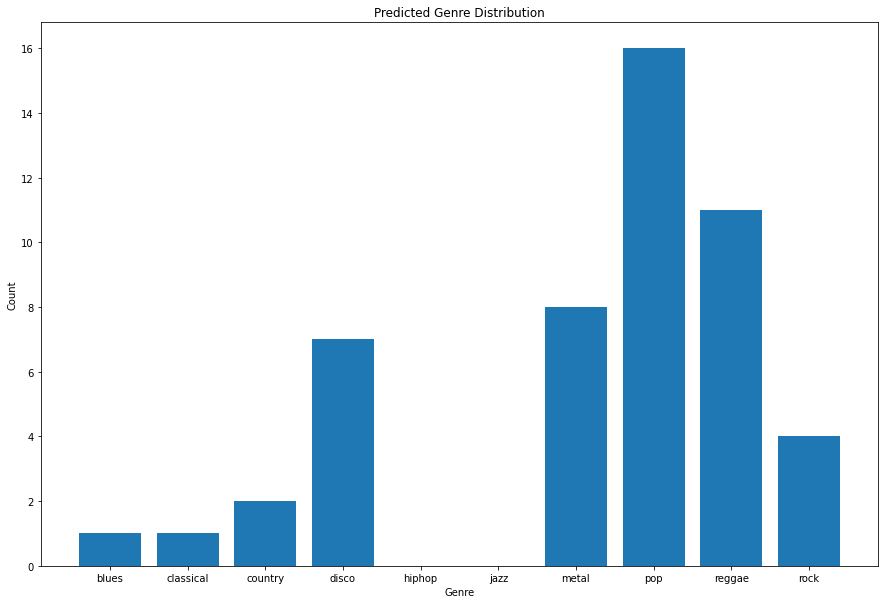

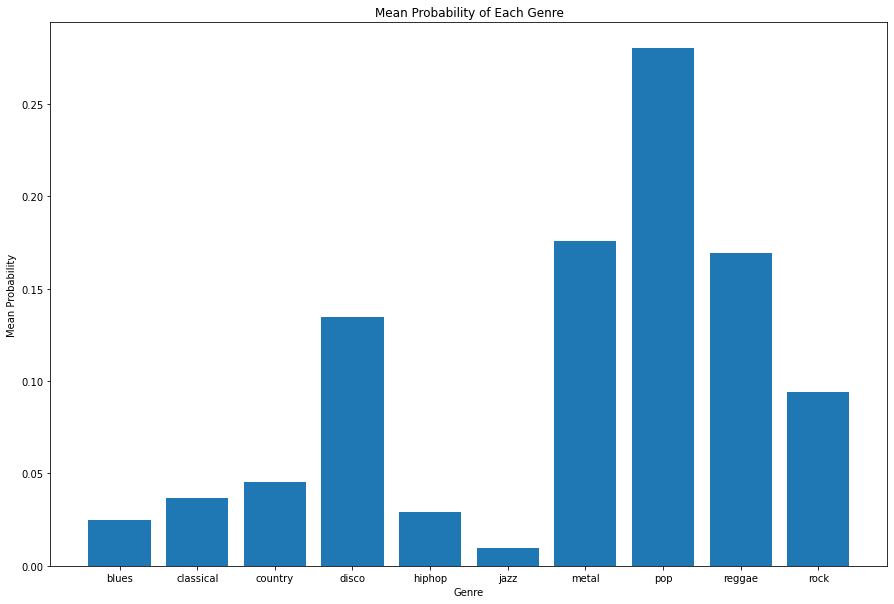

In [7]:
queen_preds, queen_probs = classifier.classify_songs('queen.csv', plot=True)


### Beatles

Classifying songs...
(71, 3968)


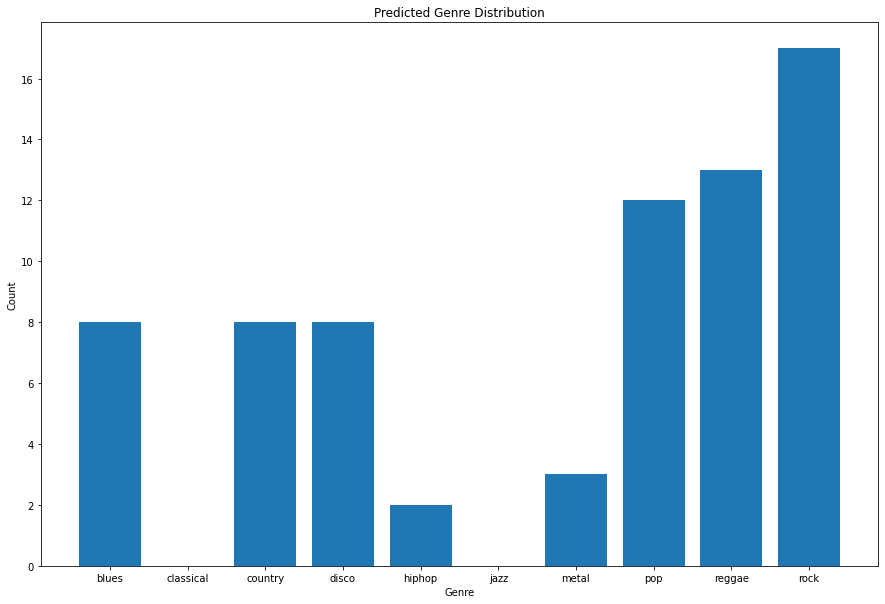

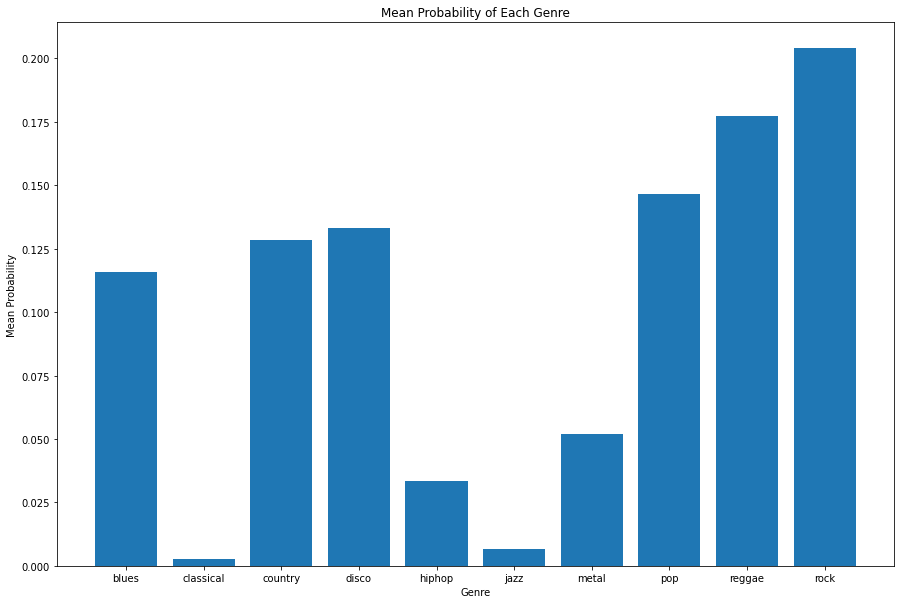

In [8]:
beatles_preds, beatles_probs = classifier.classify_songs('beatles.csv', plot=True)

## Accuracy: Metal

In [22]:
from sklearn.metrics import accuracy_score


def getAccuracy(predictions, genre):
    genres = pd.read_csv('vggish_features.csv')['genre']
    le = LabelEncoder()
    le.fit(genres)
    genre = np.array(le.transform([genre] * len(predictions)))
    accuracy = accuracy_score(genre, predictions)
    return accuracy

print("ACDC Accuracy: ", getAccuracy(acdc_preds, 'metal'))
print("Metallica Accuracy: ", getAccuracy(metallica_preds, 'metal'))
print("Rolling Stones Accuracy: ", getAccuracy(rolling_preds, 'rock'))
print("Pink Floyd Accuracy: ", getAccuracy(pink_preds, 'rock'))
print("Queen Accuracy: ", getAccuracy(queen_preds, 'rock'))
print("Beatles Accuracy: ", getAccuracy(beatles_preds, 'rock'))

ACDC Accuracy:  0.8363636363636363
Metallica Accuracy:  0.72
Rolling Stones Accuracy:  0.41935483870967744
Pink Floyd Accuracy:  0.18518518518518517
Queen Accuracy:  0.08
Beatles Accuracy:  0.11267605633802817


## Similarity scores

In [11]:
import similarity_model
import pandas as pd
import numpy as np

# load vggish features
vggish_features = pd.read_csv('vggish_features.csv')

# randomly sample 100 songs from any genre

samples = vggish_features

accuracy_scores = []

# iterate through each sample
for index, row in samples.iterrows():
    sample = vggish_features.loc[index]

    sample_genre = sample['genre']
    features = sample.drop(['genre', 'song'])
    similar_songs = similarity_model.findTopKSimilarSongsFromFeatures(features, "cosine_similarity", 10, print_results=False)

    
    similar_genres = []
    for similar_song in similar_songs:
        l = similar_song.split('.')
        similar_genres.append(l[0])

    # get the total amount og genres that equal the sample genre
    total = 0
    for similar_genre in similar_genres:
        if similar_genre == sample_genre:
            total += 1
    
    # calculate the accuracy
    accuracy = total / len(similar_genres)

    accuracy_scores.append(accuracy)


Mean Accuracy:  0.7394394394394395


Text(0.5, 1.0, 'Histogram of percentage of similar songs in same genre as input song')

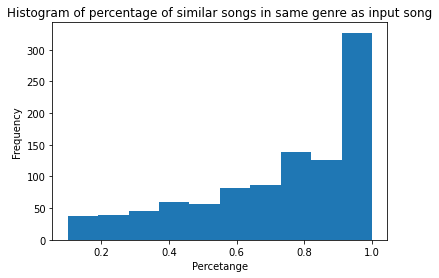

In [13]:
import numpy as np
import matplotlib.pyplot as plt

print("Mean Accuracy: ", np.mean(accuracy_scores))

# plot histogram of accuracy scores
plt.hist(accuracy_scores)
plt.xlabel('Percetange')
plt.ylabel('Frequency')
plt.title('Histogram of percentage of similar songs in same genre as input song')